In [17]:
library(rnaturalearth) # ne_countries
library(rnaturalearthdata)
library(tidyverse)
library(sf) # st_as_sf()
library(mapdata) # maps

# color
library(ggplot2)
library(RColorBrewer)
library(ggsci)
library(viridis)
library(paletteer)
library(colorBlindness)

In [18]:
# geographical position
geo = read.csv('input_data/coordinate/Longitude_and_latitude.csv',encoding = 'UTF-8')
selceted_region = c('CN','HK','GB','ES','US','FR','DE','AU',
                    'CL','PT','MX','ZA','BR','IL','RU','JP','EG','IN','QA')# United Kingdom: GB
colnames(geo) = c('code','region','longitude','latitude')

# version1

In [19]:
# map_only countries
map = geo %>% filter(code %in% selceted_region) 
map$region = str_replace(map$region,'Russia','Russian Federation')
map$region

[1] "Australia"          "Brazil"             "Chile"             
 [4] "China"              "Germany"            "Egypt"             
 [7] "Spain"              "France"             "United Kingdom"    
[10] "Hong Kong"          "Israel"             "India"             
[13] "Japan"              "Mexico"             "Portugal"          
[16] "Qatar"              "Russian Federation" "United States"     
[19] "South Africa"

,long,lat,group,order,region,subregion,selected
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,-69.89912,12.45200,1,1,Aruba,NA,no
2,-69.89571,12.42300,1,2,Aruba,NA,no
3,-69.94219,12.43853,1,3,Aruba,NA,no
4,-70.00415,12.50049,1,4,Aruba,NA,no
5,-70.06612,12.54697,1,5,Aruba,NA,no
6,-70.05088,12.59707,1,6,Aruba,NA,no


Warning message in geom_map(map = world, aes(x = long, y = lat, map_id = region, :
"Ignoring unknown aesthetics: x and y"


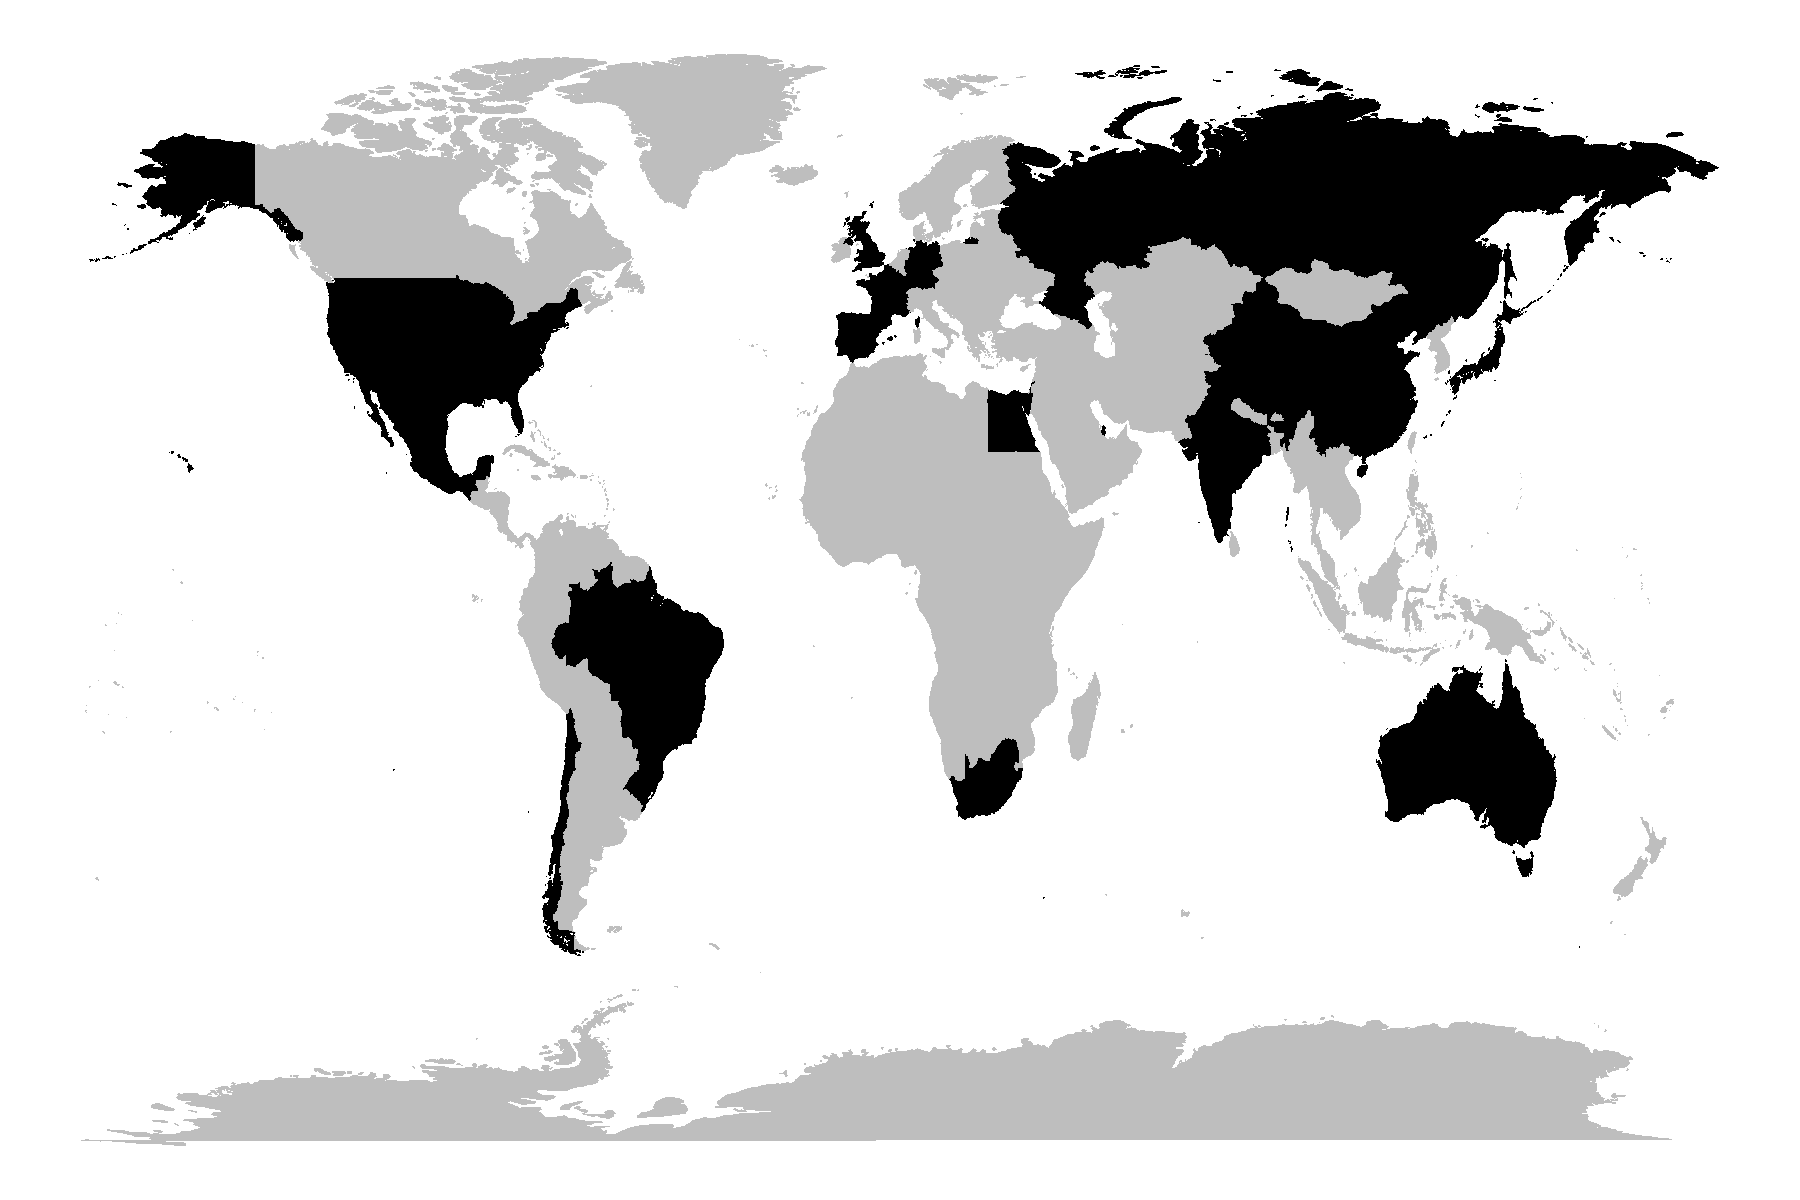

In [20]:
world <- map_data("world")
REGIONS = c('Australia','Brazil','Chile','China','Germany',
            'Egypt','Spain','France','UK','Hong Kong',
            'Israel','India','Japan','Mexico','Portugal','Qatar',
            'Russia','USA','South Africa')
world = world %>% mutate(selected=case_when(world$region%in%REGIONS~'yes',
                                           TRUE~'no'))
head(world)

options(repr.plot.width = 15,repr.plot.height = 10)
ggplot(world)+
geom_map(map = world,
    aes(x=long, y=lat, map_id = region,
       fill=selected,color=selected))+
  scale_color_manual(values=c('yes'='black','no'='grey'))+
  scale_fill_manual(values=c('yes'='black','no'='grey'))+

theme_void()+
theme(legend.position = 'none')

In [21]:
temp = world %>% filter(selected=='yes')
unique(temp$'region')
length(unique(temp$'region')) # Hongkong is included in China

[1] "Australia"    "Brazil"       "Chile"        "China"        "Germany"     
 [6] "Egypt"        "Spain"        "France"       "UK"           "India"       
[11] "Israel"       "Japan"        "Mexico"       "Portugal"     "Qatar"       
[16] "Russia"       "USA"          "South Africa"

[1] 18

# version2

In [22]:
World <- ne_countries(scale = "medium", type = "countries", 
                  continent = c('Asia','Europe','North America',
                                'South America','Africa','Oceania'),
                  country = NULL, geounit = NULL, sovereignty = NULL,
                  returnclass = c("sf"))
map_countries = World %>% mutate(selected = case_when(name_long %in% map$region~'yes',
                                                     TRUE~'no'))

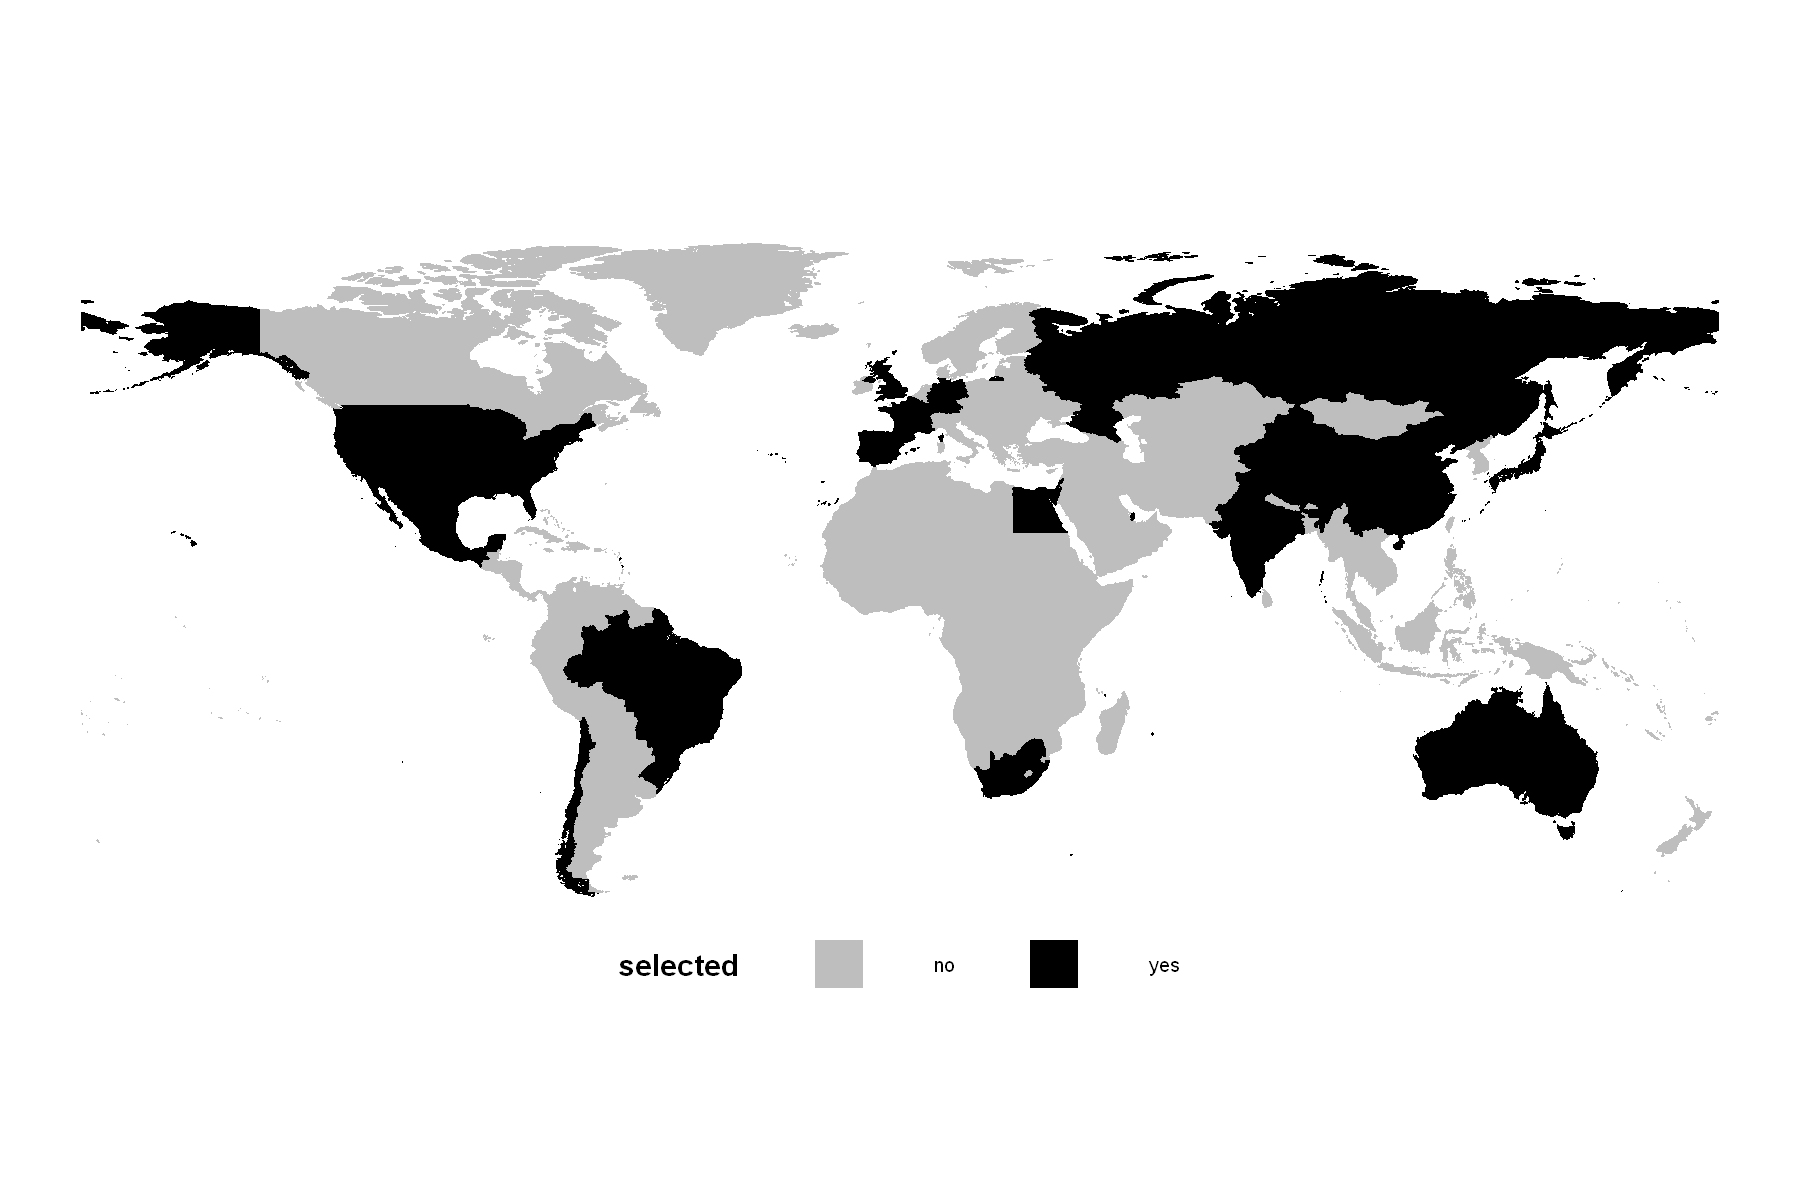

In [23]:
options(repr.plot.width = 15,repr.plot.height = 10)
ggplot(map_countries) +
  geom_sf(aes(fill = selected,color=selected)) + 
  scale_color_manual(values=c('yes'='black','no'='grey'))+
  scale_fill_manual(values=c('yes'='black','no'='grey'))+

  theme_void()+
  theme(legend.position = 'bottom',legend.key.size = unit(30,'pt'),
        legend.title = element_text(size=18,face="bold"),
        legend.spacing.x = unit(1.5, 'cm'),
        legend.text=element_text(size=12))